# NBA Matchup Predictor

In [102]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(1)

from tensorflow import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import hvplot.pandas
%matplotlib inline

random.set_seed(2)

## Define `standard_scaler`

In [103]:
# define standard scaler
standard_scaler = StandardScaler()
#standard_scaler.fit_transform()

## Prepare Data

In [104]:
features = pd.read_csv('../Resources/training_data_features.csv')
target = pd.read_csv('../Resources/training_data_target.csv')

### Features 

In [74]:
features.fillna(0, inplace=True)

In [130]:
h2h_features=features[features.columns[-15:]].copy()
h2h_features.head(2)

,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,game_score
0,997.75,1.0,3.25,1.0,2.75,0.0,0.0,0.25,2.5,2.0,0.0,0.25,1.0,2.0,1.825
1,786.40,1.6,3.20,1.4,3.00,0.0,0.0,0.00,0.8,0.4,0.0,0.00,0.6,1.4,2.360


### Remove Confounding Features

In [128]:
h2h_features.corr()

,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,game_score
seconds_played,1.000000,0.808446,0.841056,0.527747,0.577738,0.610528,0.620477,0.293148,0.594980,0.577669,0.554502,0.273554,0.638556,0.572839,0.771477
made_field_goals,0.808446,1.000000,0.946946,0.515681,0.516720,0.738391,0.742533,0.307666,0.576587,0.568087,0.444944,0.282312,0.677458,0.433942,0.930268
attempted_field_goals,0.841056,0.946946,1.000000,0.593375,0.658626,0.745120,0.732483,0.194196,0.507458,0.619391,0.477763,0.188798,0.704803,0.419018,0.843758
made_three_point_field_goals,0.527747,0.515681,0.593375,1.000000,0.927778,0.352904,0.282903,-0.275023,0.069222,0.404937,0.315958,-0.158297,0.369208,0.135881,0.484357
attempted_three_point_field_goals,0.577738,0.516720,0.658626,0.927778,1.000000,0.403892,0.333138,-0.290874,0.088037,0.463814,0.364446,-0.160768,0.424289,0.160722,0.455973
made_free_throws,0.610528,0.738391,0.745120,0.352904,0.403892,1.000000,0.973627,0.222769,0.489427,0.541662,0.369102,0.232231,0.630859,0.331433,0.810115
attempted_free_throws,0.620477,0.742533,0.732483,0.282903,0.333138,0.973627,1.000000,0.314119,0.551502,0.528737,0.376269,0.295557,0.647232,0.372919,0.808953
offensive_rebounds,0.293148,0.307666,0.194196,-0.275023,-0.290874,0.222769,0.314119,1.000000,0.630883,-0.017346,0.102739,0.530090,0.187764,0.394729,0.382914
defensive_rebounds,0.594980,0.576587,0.507458,0.069222,0.088037,0.489427,0.551502,0.630883,1.000000,0.302545,0.293132,0.559648,0.477650,0.490773,0.657027
assists,0.577669,0.568087,0.619391,0.404937,0.463814,0.541662,0.528737,-0.017346,0.302545,1.000000,0.489897,-0.014269,0.711620,0.258914,0.642745


In [131]:
h2h_features.drop(columns = ['game_score'], inplace=True)

In [132]:
scaled_df = pd.DataFrame(standard_scaler.fit_transform(h2h_features))
feature_array = scaled_df.to_numpy()

In [133]:
feature_array = feature_array.reshape((2328,70))

In [134]:
feature_array.shape

(2328, 70)

### Target

In [112]:
target.head(2)

,Unnamed: 0,game_id,outcomes
0,0,7400,LOSS
1,1,7401,LOSS


In [113]:
target.outcomes = target.outcomes.str.replace('LOSS','0')
target.outcomes = target.outcomes.str.replace('WIN','1')
target.outcomes = target.outcomes.astype('int')
target.head(2)

,Unnamed: 0,game_id,outcomes
0,0,7400,0
1,1,7401,0


In [114]:
target_array = target[['outcomes']].to_numpy()
target_array.shape

(2328, 1)

## Make Model 1 - Simple Model

In [120]:
# specify number of units
number_units = 150
dropout = .1

In [145]:
# Define model_1

model_1 = Sequential()
model_1.add(Dense(units=number_units, input_dim=(70)))
#model_1.add(Dropout(dropout))
model_1.add(Dense(units=number_units))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 150)               10650     
_________________________________________________________________
dense_22 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 151       
Total params: 33,451
Trainable params: 33,451
Non-trainable params: 0
_________________________________________________________________


In [19]:
print(feature_array.shape, target_array.shape)

(2328, 5, 57) (2328, 1)


In [146]:
model1 = model_1.fit(feature_array,target_array, validation_split=.3, epochs=30)

Train on 1629 samples, validate on 699 samples
Epoch 1/30
1629/1629 [==============================] - 1s 411us/sample - loss: 5.9597 - accuracy: 0.5513 - val_loss: 6.9002 - val_accuracy: 0.5165
Epoch 2/30
1629/1629 [==============================] - 0s 89us/sample - loss: 5.7285 - accuracy: 0.5979 - val_loss: 7.2631 - val_accuracy: 0.4907
Epoch 3/30
1629/1629 [==============================] - 0s 93us/sample - loss: 5.8659 - accuracy: 0.5948 - val_loss: 6.9963 - val_accuracy: 0.5036
Epoch 4/30
1629/1629 [==============================] - 0s 102us/sample - loss: 5.7503 - accuracy: 0.6096 - val_loss: 7.3580 - val_accuracy: 0.4936
Epoch 5/30
1629/1629 [==============================] - 0s 64us/sample - loss: 5.9946 - accuracy: 0.5912 - val_loss: 6.8771 - val_accuracy: 0.5393
Epoch 6/30
1629/1629 [==============================] - 0s 63us/sample - loss: 6.2326 - accuracy: 0.5813 - val_loss: 6.8968 - val_accuracy: 0.5351
Epoch 7/30
1629/1629 [==============================] - 0s 62us/sampl

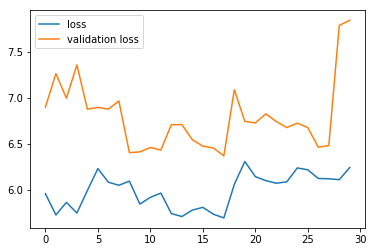

In [147]:
plt.plot(model1.history["loss"])
plt.plot(model1.history["val_loss"])

plt.legend(["loss", "validation loss"])
plt.show()

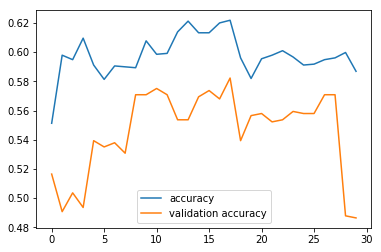

In [148]:
plt.plot(model1.history["accuracy"])
plt.plot(model1.history["val_accuracy"])

plt.legend(["accuracy", "validation accuracy"])
plt.show()

In [125]:
model_1.evaluate(feature_array[-699:],target_array[-699:])

699/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[6.6552429253792385, 0.5550787]

In [35]:
results = model_1.predict(feature_array[-699:])

In [39]:
results_df = pd.DataFrame(results)
target_df = pd.DataFrame(target_array[-699:])

In [42]:
test_df = pd.concat([results_df,target_df],axis='columns')

In [44]:
test_df.columns=['pred','real']

In [45]:
test_df.corr()

,pred,real
pred,1.000000,0.206554
real,0.206554,1.000000


In [49]:
len(test_df[test_df.real==0])

314

In [52]:
print(f'Probability of Win : {round(385/699,2)}')

Probability of Win : 0.55


In [70]:
def mapper(num):
    if num> .55:
        return 1
    else:
        return 0

In [71]:
test_df['mapped']=test_df.pred.apply(lambda x: mapper(x))

In [72]:
test_df.corr()

,pred,real,mapped
pred,1.000000,0.206554,0.792163
real,0.206554,1.000000,0.179724
mapped,0.792163,0.179724,1.000000


In [56]:
test_df.corr()

,pred,real,mapped
pred,1.000000,0.206554,0.727859
real,0.206554,1.000000,0.167683
mapped,0.727859,0.167683,1.000000
